### Deliverable 1: Preprocessing the Data for a Neural Network

In [23]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [24]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN","NAME","STATUS","SPECIAL_CONSIDERATIONS"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [25]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [26]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df["APPLICATION_TYPE"].value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

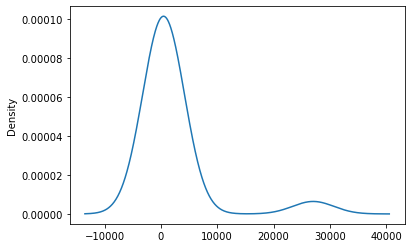

In [27]:
# Visualize the value counts of APPLICATION_TYPE
application_type.plot.density()

In [28]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type[application_type < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [29]:
# Look at CLASSIFICATION value counts for binning
classification_value = application_df['CLASSIFICATION'].value_counts()
classification_value

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

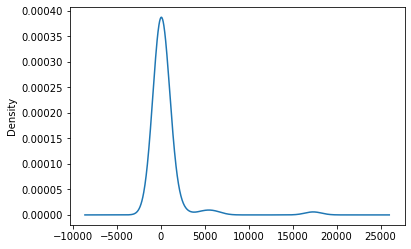

In [30]:
# Visualize the value counts of CLASSIFICATION
classification_value.plot.density()

In [31]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_value[classification_value < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [32]:
# Generate our categorical variable lists
categorical_app = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
categorical_app

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [33]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[categorical_app]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(categorical_app)
encode_df.head()

C:\Users\ckrac\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True,right_index=True)
application_df = application_df.drop(columns = categorical_app)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\ckrac\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [49]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 80)                3280      
                                                                 
 dense_16 (Dense)            (None, 30)                2430      
                                                                 
 dense_17 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,741
Trainable params: 5,741
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [51]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("../Resources/",exist_ok=True)
checkpoint_path = "../Resources/opti_weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=30,callbacks=[cp_callback])

Epoch 1/30
  1/804 [..............................] - ETA: 2:59 - loss: 2364.4133 - accuracy: 0.5312
Epoch 1: saving model to ../Resources\opti_weights.01.hdf5

Epoch 1: saving model to ../Resources\opti_weights.01.hdf5

Epoch 1: saving model to ../Resources\opti_weights.01.hdf5
 15/804 [..............................] - ETA: 3s - loss: 737.5229 - accuracy: 0.4812   
Epoch 1: saving model to ../Resources\opti_weights.01.hdf5

Epoch 1: saving model to ../Resources\opti_weights.01.hdf5

Epoch 1: saving model to ../Resources\opti_weights.01.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 492.3596 - accuracy: 0.4823
Epoch 1: saving model to ../Resources\opti_weights.01.hdf5

Epoch 1: saving model to ../Resources\opti_weights.01.hdf5

Epoch 1: saving model to ../Resources\opti_weights.01.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 857.4842 - accuracy: 0.4819
Epoch 1: saving model to ../Resources\opti_weights.01.hdf5

Epoch 1: saving model to ../Resources\


Epoch 1: saving model to ../Resources\opti_weights.01.hdf5

Epoch 1: saving model to ../Resources\opti_weights.01.hdf5
465/804 [================>.............] - ETA: 1s - loss: 13940.0352 - accuracy: 0.4976
Epoch 1: saving model to ../Resources\opti_weights.01.hdf5

Epoch 1: saving model to ../Resources\opti_weights.01.hdf5

Epoch 1: saving model to ../Resources\opti_weights.01.hdf5
480/804 [================>.............] - ETA: 1s - loss: 13506.4531 - accuracy: 0.4979
Epoch 1: saving model to ../Resources\opti_weights.01.hdf5

Epoch 1: saving model to ../Resources\opti_weights.01.hdf5

Epoch 1: saving model to ../Resources\opti_weights.01.hdf5
495/804 [=================>............] - ETA: 1s - loss: 13291.9365 - accuracy: 0.4965
Epoch 1: saving model to ../Resources\opti_weights.01.hdf5

Epoch 1: saving model to ../Resources\opti_weights.01.hdf5

Epoch 1: saving model to ../Resources\opti_weights.01.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 12976.3984 - accu

106/804 [==>...........................] - ETA: 2s - loss: 9998.0273 - accuracy: 0.4985 
Epoch 2: saving model to ../Resources\opti_weights.02.hdf5

Epoch 2: saving model to ../Resources\opti_weights.02.hdf5

Epoch 2: saving model to ../Resources\opti_weights.02.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 8812.6230 - accuracy: 0.5021
Epoch 2: saving model to ../Resources\opti_weights.02.hdf5

Epoch 2: saving model to ../Resources\opti_weights.02.hdf5

Epoch 2: saving model to ../Resources\opti_weights.02.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 7962.7085 - accuracy: 0.5009
Epoch 2: saving model to ../Resources\opti_weights.02.hdf5

Epoch 2: saving model to ../Resources\opti_weights.02.hdf5

Epoch 2: saving model to ../Resources\opti_weights.02.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 7260.4595 - accuracy: 0.4998
Epoch 2: saving model to ../Resources\opti_weights.02.hdf5

Epoch 2: saving model to ../Resources\opti_weights


Epoch 2: saving model to ../Resources\opti_weights.02.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 37397.9219 - accuracy: 0.5032
Epoch 2: saving model to ../Resources\opti_weights.02.hdf5

Epoch 2: saving model to ../Resources\opti_weights.02.hdf5

Epoch 2: saving model to ../Resources\opti_weights.02.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 36557.2656 - accuracy: 0.5011
Epoch 2: saving model to ../Resources\opti_weights.02.hdf5

Epoch 2: saving model to ../Resources\opti_weights.02.hdf5

Epoch 2: saving model to ../Resources\opti_weights.02.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 35682.6172 - accuracy: 0.5009
Epoch 2: saving model to ../Resources\opti_weights.02.hdf5

Epoch 2: saving model to ../Resources\opti_weights.02.hdf5

Epoch 2: saving model to ../Resources\opti_weights.02.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 34985.5273 - accuracy: 0.4996
Epoch 2: saving model to ../Resources\opti_weig


Epoch 3: saving model to ../Resources\opti_weights.03.hdf5

Epoch 3: saving model to ../Resources\opti_weights.03.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 19235.0859 - accuracy: 0.4824
Epoch 3: saving model to ../Resources\opti_weights.03.hdf5

Epoch 3: saving model to ../Resources\opti_weights.03.hdf5

Epoch 3: saving model to ../Resources\opti_weights.03.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 18747.7324 - accuracy: 0.4858
Epoch 3: saving model to ../Resources\opti_weights.03.hdf5

Epoch 3: saving model to ../Resources\opti_weights.03.hdf5

Epoch 3: saving model to ../Resources\opti_weights.03.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 24515.3574 - accuracy: 0.4870
Epoch 3: saving model to ../Resources\opti_weights.03.hdf5

Epoch 3: saving model to ../Resources\opti_weights.03.hdf5

Epoch 3: saving model to ../Resources\opti_weights.03.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 23298.1816 - accu

672/804 [========================>.....] - ETA: 0s - loss: 13882.3770 - accuracy: 0.4953
Epoch 3: saving model to ../Resources\opti_weights.03.hdf5

Epoch 3: saving model to ../Resources\opti_weights.03.hdf5

Epoch 3: saving model to ../Resources\opti_weights.03.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 13582.3887 - accuracy: 0.4960
Epoch 3: saving model to ../Resources\opti_weights.03.hdf5

Epoch 3: saving model to ../Resources\opti_weights.03.hdf5

Epoch 3: saving model to ../Resources\opti_weights.03.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 13319.3232 - accuracy: 0.4957
Epoch 3: saving model to ../Resources\opti_weights.03.hdf5

Epoch 3: saving model to ../Resources\opti_weights.03.hdf5

Epoch 3: saving model to ../Resources\opti_weights.03.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 13070.4336 - accuracy: 0.4959
Epoch 3: saving model to ../Resources\opti_weights.03.hdf5

Epoch 3: saving model to ../Resources\opti_weig


Epoch 4: saving model to ../Resources\opti_weights.04.hdf5

Epoch 4: saving model to ../Resources\opti_weights.04.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 21346.0371 - accuracy: 0.5119
Epoch 4: saving model to ../Resources\opti_weights.04.hdf5

Epoch 4: saving model to ../Resources\opti_weights.04.hdf5

Epoch 4: saving model to ../Resources\opti_weights.04.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 21133.9961 - accuracy: 0.5110
Epoch 4: saving model to ../Resources\opti_weights.04.hdf5

Epoch 4: saving model to ../Resources\opti_weights.04.hdf5

Epoch 4: saving model to ../Resources\opti_weights.04.hdf5
358/804 [============>.................] - ETA: 1s - loss: 20291.7676 - accuracy: 0.5100
Epoch 4: saving model to ../Resources\opti_weights.04.hdf5

Epoch 4: saving model to ../Resources\opti_weights.04.hdf5

Epoch 4: saving model to ../Resources\opti_weights.04.hdf5
373/804 [============>.................] - ETA: 1s - loss: 19786.8750 - accu

778/804 [============================>.] - ETA: 0s - loss: 11634.3379 - accuracy: 0.5071
Epoch 4: saving model to ../Resources\opti_weights.04.hdf5

Epoch 4: saving model to ../Resources\opti_weights.04.hdf5

Epoch 4: saving model to ../Resources\opti_weights.04.hdf5
793/804 [============================>.] - ETA: 0s - loss: 11574.8477 - accuracy: 0.5057
Epoch 4: saving model to ../Resources\opti_weights.04.hdf5

Epoch 4: saving model to ../Resources\opti_weights.04.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 11432.6006 - accuracy: 0.5054
Epoch 5/30
  1/804 [..............................] - ETA: 0s - loss: 167.0893 - accuracy: 0.3750
Epoch 5: saving model to ../Resources\opti_weights.05.hdf5

Epoch 5: saving model to ../Resources\opti_weights.05.hdf5

Epoch 5: saving model to ../Resources\opti_weights.05.hdf5
 14/804 [..............................] - ETA: 3s - loss: 10297.9307 - accuracy: 0.4621
Epoch 5: saving model to ../Resources\opti_weights.05.hdf5

Epoch


Epoch 5: saving model to ../Resources\opti_weights.05.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 9896.9834 - accuracy: 0.4768 
Epoch 5: saving model to ../Resources\opti_weights.05.hdf5

Epoch 5: saving model to ../Resources\opti_weights.05.hdf5

Epoch 5: saving model to ../Resources\opti_weights.05.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 12131.8438 - accuracy: 0.4791
Epoch 5: saving model to ../Resources\opti_weights.05.hdf5

Epoch 5: saving model to ../Resources\opti_weights.05.hdf5

Epoch 5: saving model to ../Resources\opti_weights.05.hdf5
459/804 [================>.............] - ETA: 1s - loss: 11748.3984 - accuracy: 0.4822
Epoch 5: saving model to ../Resources\opti_weights.05.hdf5

Epoch 5: saving model to ../Resources\opti_weights.05.hdf5

Epoch 5: saving model to ../Resources\opti_weights.05.hdf5
474/804 [================>.............] - ETA: 1s - loss: 11422.4023 - accuracy: 0.4819
Epoch 5: saving model to ../Resources\opti_weig


Epoch 6: saving model to ../Resources\opti_weights.06.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 50127.7891 - accuracy: 0.5221
Epoch 6: saving model to ../Resources\opti_weights.06.hdf5

Epoch 6: saving model to ../Resources\opti_weights.06.hdf5

Epoch 6: saving model to ../Resources\opti_weights.06.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 43669.6172 - accuracy: 0.5302
Epoch 6: saving model to ../Resources\opti_weights.06.hdf5

Epoch 6: saving model to ../Resources\opti_weights.06.hdf5

Epoch 6: saving model to ../Resources\opti_weights.06.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 42049.4727 - accuracy: 0.5324
Epoch 6: saving model to ../Resources\opti_weights.06.hdf5

Epoch 6: saving model to ../Resources\opti_weights.06.hdf5

Epoch 6: saving model to ../Resources\opti_weights.06.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 41697.4922 - accuracy: 0.5310
Epoch 6: saving model to ../Resources\opti_weig


Epoch 6: saving model to ../Resources\opti_weights.06.hdf5

Epoch 6: saving model to ../Resources\opti_weights.06.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 19171.9941 - accuracy: 0.5323
Epoch 6: saving model to ../Resources\opti_weights.06.hdf5

Epoch 6: saving model to ../Resources\opti_weights.06.hdf5

Epoch 6: saving model to ../Resources\opti_weights.06.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 18867.9297 - accuracy: 0.5323
Epoch 6: saving model to ../Resources\opti_weights.06.hdf5

Epoch 6: saving model to ../Resources\opti_weights.06.hdf5

Epoch 6: saving model to ../Resources\opti_weights.06.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 21676.0430 - accuracy: 0.5330
Epoch 6: saving model to ../Resources\opti_weights.06.hdf5

Epoch 6: saving model to ../Resources\opti_weights.06.hdf5

Epoch 6: saving model to ../Resources\opti_weights.06.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 33553.1211 - accu

181/804 [=====>........................] - ETA: 2s - loss: 48562.8008 - accuracy: 0.5375
Epoch 7: saving model to ../Resources\opti_weights.07.hdf5

Epoch 7: saving model to ../Resources\opti_weights.07.hdf5

Epoch 7: saving model to ../Resources\opti_weights.07.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 44862.4609 - accuracy: 0.5359
Epoch 7: saving model to ../Resources\opti_weights.07.hdf5

Epoch 7: saving model to ../Resources\opti_weights.07.hdf5

Epoch 7: saving model to ../Resources\opti_weights.07.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 41894.0586 - accuracy: 0.5317
Epoch 7: saving model to ../Resources\opti_weights.07.hdf5

Epoch 7: saving model to ../Resources\opti_weights.07.hdf5

Epoch 7: saving model to ../Resources\opti_weights.07.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 39158.9688 - accuracy: 0.5337
Epoch 7: saving model to ../Resources\opti_weights.07.hdf5

Epoch 7: saving model to ../Resources\opti_weig


Epoch 7: saving model to ../Resources\opti_weights.07.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 20460.0176 - accuracy: 0.5218
Epoch 7: saving model to ../Resources\opti_weights.07.hdf5

Epoch 7: saving model to ../Resources\opti_weights.07.hdf5

Epoch 7: saving model to ../Resources\opti_weights.07.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 20005.9336 - accuracy: 0.5212
Epoch 7: saving model to ../Resources\opti_weights.07.hdf5

Epoch 7: saving model to ../Resources\opti_weights.07.hdf5

Epoch 7: saving model to ../Resources\opti_weights.07.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 19661.5781 - accuracy: 0.5193
Epoch 7: saving model to ../Resources\opti_weights.07.hdf5

Epoch 7: saving model to ../Resources\opti_weights.07.hdf5

Epoch 7: saving model to ../Resources\opti_weights.07.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 19247.5957 - accuracy: 0.5176
Epoch 7: saving model to ../Resources\opti_weig


Epoch 8: saving model to ../Resources\opti_weights.08.hdf5

Epoch 8: saving model to ../Resources\opti_weights.08.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 3500.1521 - accuracy: 0.4966
Epoch 8: saving model to ../Resources\opti_weights.08.hdf5

Epoch 8: saving model to ../Resources\opti_weights.08.hdf5

Epoch 8: saving model to ../Resources\opti_weights.08.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 3369.5444 - accuracy: 0.4946
Epoch 8: saving model to ../Resources\opti_weights.08.hdf5

Epoch 8: saving model to ../Resources\opti_weights.08.hdf5

Epoch 8: saving model to ../Resources\opti_weights.08.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 3222.7644 - accuracy: 0.4944
Epoch 8: saving model to ../Resources\opti_weights.08.hdf5

Epoch 8: saving model to ../Resources\opti_weights.08.hdf5

Epoch 8: saving model to ../Resources\opti_weights.08.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 3120.5862 - accuracy

747/804 [==========================>...] - ETA: 0s - loss: 6186.2036 - accuracy: 0.4880
Epoch 8: saving model to ../Resources\opti_weights.08.hdf5

Epoch 8: saving model to ../Resources\opti_weights.08.hdf5

Epoch 8: saving model to ../Resources\opti_weights.08.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 6252.3354 - accuracy: 0.4875
Epoch 8: saving model to ../Resources\opti_weights.08.hdf5

Epoch 8: saving model to ../Resources\opti_weights.08.hdf5

Epoch 8: saving model to ../Resources\opti_weights.08.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 6707.8013 - accuracy: 0.4867
Epoch 8: saving model to ../Resources\opti_weights.08.hdf5

Epoch 8: saving model to ../Resources\opti_weights.08.hdf5

Epoch 8: saving model to ../Resources\opti_weights.08.hdf5
792/804 [============================>.] - ETA: 0s - loss: 6668.3057 - accuracy: 0.4870
Epoch 8: saving model to ../Resources\opti_weights.08.hdf5

Epoch 8: saving model to ../Resources\opti_weights.


Epoch 9: saving model to ../Resources\opti_weights.09.hdf5

Epoch 9: saving model to ../Resources\opti_weights.09.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 38755.4531 - accuracy: 0.5180
Epoch 9: saving model to ../Resources\opti_weights.09.hdf5

Epoch 9: saving model to ../Resources\opti_weights.09.hdf5

Epoch 9: saving model to ../Resources\opti_weights.09.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 37367.6836 - accuracy: 0.5187
Epoch 9: saving model to ../Resources\opti_weights.09.hdf5

Epoch 9: saving model to ../Resources\opti_weights.09.hdf5

Epoch 9: saving model to ../Resources\opti_weights.09.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 36079.2422 - accuracy: 0.5184
Epoch 9: saving model to ../Resources\opti_weights.09.hdf5

Epoch 9: saving model to ../Resources\opti_weights.09.hdf5

Epoch 9: saving model to ../Resources\opti_weights.09.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 34880.4727 - accu

 44/804 [>.............................] - ETA: 2s - loss: 317.7968 - accuracy: 0.5646
Epoch 10: saving model to ../Resources\opti_weights.10.hdf5

Epoch 10: saving model to ../Resources\opti_weights.10.hdf5

Epoch 10: saving model to ../Resources\opti_weights.10.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 376.8610 - accuracy: 0.5471
Epoch 10: saving model to ../Resources\opti_weights.10.hdf5

Epoch 10: saving model to ../Resources\opti_weights.10.hdf5

Epoch 10: saving model to ../Resources\opti_weights.10.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 357.3088 - accuracy: 0.5363
Epoch 10: saving model to ../Resources\opti_weights.10.hdf5

Epoch 10: saving model to ../Resources\opti_weights.10.hdf5

Epoch 10: saving model to ../Resources\opti_weights.10.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 312.5461 - accuracy: 0.5492
Epoch 10: saving model to ../Resources\opti_weights.10.hdf5

Epoch 10: saving model to ../Resources\opti_w


Epoch 10: saving model to ../Resources\opti_weights.10.hdf5

Epoch 10: saving model to ../Resources\opti_weights.10.hdf5
509/804 [=================>............] - ETA: 1s - loss: 1703.6061 - accuracy: 0.5311
Epoch 10: saving model to ../Resources\opti_weights.10.hdf5

Epoch 10: saving model to ../Resources\opti_weights.10.hdf5

Epoch 10: saving model to ../Resources\opti_weights.10.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 1698.3368 - accuracy: 0.5304
Epoch 10: saving model to ../Resources\opti_weights.10.hdf5

Epoch 10: saving model to ../Resources\opti_weights.10.hdf5

Epoch 10: saving model to ../Resources\opti_weights.10.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 1975.0232 - accuracy: 0.5286
Epoch 10: saving model to ../Resources\opti_weights.10.hdf5

Epoch 10: saving model to ../Resources\opti_weights.10.hdf5

Epoch 10: saving model to ../Resources\opti_weights.10.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 1938.4445

140/804 [====>.........................] - ETA: 2s - loss: 26896.8047 - accuracy: 0.4775
Epoch 11: saving model to ../Resources\opti_weights.11.hdf5

Epoch 11: saving model to ../Resources\opti_weights.11.hdf5

Epoch 11: saving model to ../Resources\opti_weights.11.hdf5
155/804 [====>.........................] - ETA: 2s - loss: 28129.5352 - accuracy: 0.4760
Epoch 11: saving model to ../Resources\opti_weights.11.hdf5

Epoch 11: saving model to ../Resources\opti_weights.11.hdf5

Epoch 11: saving model to ../Resources\opti_weights.11.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 37151.3633 - accuracy: 0.4785
Epoch 11: saving model to ../Resources\opti_weights.11.hdf5

Epoch 11: saving model to ../Resources\opti_weights.11.hdf5

Epoch 11: saving model to ../Resources\opti_weights.11.hdf5
185/804 [=====>........................] - ETA: 2s - loss: 41756.3281 - accuracy: 0.4819
Epoch 11: saving model to ../Resources\opti_weights.11.hdf5

Epoch 11: saving model to ../Resource

590/804 [=====================>........] - ETA: 0s - loss: 25614.2324 - accuracy: 0.4905
Epoch 11: saving model to ../Resources\opti_weights.11.hdf5

Epoch 11: saving model to ../Resources\opti_weights.11.hdf5

Epoch 11: saving model to ../Resources\opti_weights.11.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 25021.4023 - accuracy: 0.4917
Epoch 11: saving model to ../Resources\opti_weights.11.hdf5

Epoch 11: saving model to ../Resources\opti_weights.11.hdf5

Epoch 11: saving model to ../Resources\opti_weights.11.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 24418.3613 - accuracy: 0.4923
Epoch 11: saving model to ../Resources\opti_weights.11.hdf5

Epoch 11: saving model to ../Resources\opti_weights.11.hdf5

Epoch 11: saving model to ../Resources\opti_weights.11.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 23862.1855 - accuracy: 0.4925
Epoch 11: saving model to ../Resources\opti_weights.11.hdf5

Epoch 11: saving model to ../Resource


Epoch 12: saving model to ../Resources\opti_weights.12.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 666.3020 - accuracy: 0.5297
Epoch 12: saving model to ../Resources\opti_weights.12.hdf5

Epoch 12: saving model to ../Resources\opti_weights.12.hdf5

Epoch 12: saving model to ../Resources\opti_weights.12.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 632.0753 - accuracy: 0.5317
Epoch 12: saving model to ../Resources\opti_weights.12.hdf5

Epoch 12: saving model to ../Resources\opti_weights.12.hdf5

Epoch 12: saving model to ../Resources\opti_weights.12.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 603.3310 - accuracy: 0.5298
Epoch 12: saving model to ../Resources\opti_weights.12.hdf5

Epoch 12: saving model to ../Resources\opti_weights.12.hdf5

Epoch 12: saving model to ../Resources\opti_weights.12.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 583.0440 - accuracy: 0.5259
Epoch 12: saving model to ../Resources\opti_w

691/804 [========================>.....] - ETA: 0s - loss: 693.1179 - accuracy: 0.5292
Epoch 12: saving model to ../Resources\opti_weights.12.hdf5

Epoch 12: saving model to ../Resources\opti_weights.12.hdf5

Epoch 12: saving model to ../Resources\opti_weights.12.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 1630.9694 - accuracy: 0.5291
Epoch 12: saving model to ../Resources\opti_weights.12.hdf5

Epoch 12: saving model to ../Resources\opti_weights.12.hdf5

Epoch 12: saving model to ../Resources\opti_weights.12.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 2553.8992 - accuracy: 0.5291
Epoch 12: saving model to ../Resources\opti_weights.12.hdf5

Epoch 12: saving model to ../Resources\opti_weights.12.hdf5

Epoch 12: saving model to ../Resources\opti_weights.12.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 2551.1150 - accuracy: 0.5287
Epoch 12: saving model to ../Resources\opti_weights.12.hdf5

Epoch 12: saving model to ../Resources\opt


Epoch 13: saving model to ../Resources\opti_weights.13.hdf5

Epoch 13: saving model to ../Resources\opti_weights.13.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 1283.0925 - accuracy: 0.4993
Epoch 13: saving model to ../Resources\opti_weights.13.hdf5

Epoch 13: saving model to ../Resources\opti_weights.13.hdf5

Epoch 13: saving model to ../Resources\opti_weights.13.hdf5
357/804 [============>.................] - ETA: 1s - loss: 1239.1503 - accuracy: 0.4988
Epoch 13: saving model to ../Resources\opti_weights.13.hdf5

Epoch 13: saving model to ../Resources\opti_weights.13.hdf5

Epoch 13: saving model to ../Resources\opti_weights.13.hdf5
372/804 [============>.................] - ETA: 1s - loss: 1192.9023 - accuracy: 0.5021
Epoch 13: saving model to ../Resources\opti_weights.13.hdf5

Epoch 13: saving model to ../Resources\opti_weights.13.hdf5

Epoch 13: saving model to ../Resources\opti_weights.13.hdf5
387/804 [=============>................] - ETA: 1s - loss: 1185.7311

792/804 [============================>.] - ETA: 0s - loss: 2931.2502 - accuracy: 0.4953
Epoch 13: saving model to ../Resources\opti_weights.13.hdf5

Epoch 13: saving model to ../Resources\opti_weights.13.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 2888.6958 - accuracy: 0.4960
Epoch 14/30
  1/804 [..............................] - ETA: 1s - loss: 97.6933 - accuracy: 0.4375
Epoch 14: saving model to ../Resources\opti_weights.14.hdf5

Epoch 14: saving model to ../Resources\opti_weights.14.hdf5

Epoch 14: saving model to ../Resources\opti_weights.14.hdf5
 14/804 [..............................] - ETA: 3s - loss: 194.4486 - accuracy: 0.5156
Epoch 14: saving model to ../Resources\opti_weights.14.hdf5

Epoch 14: saving model to ../Resources\opti_weights.14.hdf5

Epoch 14: saving model to ../Resources\opti_weights.14.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 337.8156 - accuracy: 0.5223
Epoch 14: saving model to ../Resources\opti_weights.14.hdf5

Ep

433/804 [===============>..............] - ETA: 1s - loss: 1364.2063 - accuracy: 0.4965
Epoch 14: saving model to ../Resources\opti_weights.14.hdf5

Epoch 14: saving model to ../Resources\opti_weights.14.hdf5

Epoch 14: saving model to ../Resources\opti_weights.14.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 1339.6189 - accuracy: 0.4962
Epoch 14: saving model to ../Resources\opti_weights.14.hdf5

Epoch 14: saving model to ../Resources\opti_weights.14.hdf5

Epoch 14: saving model to ../Resources\opti_weights.14.hdf5
463/804 [================>.............] - ETA: 1s - loss: 1310.7886 - accuracy: 0.4959
Epoch 14: saving model to ../Resources\opti_weights.14.hdf5

Epoch 14: saving model to ../Resources\opti_weights.14.hdf5

Epoch 14: saving model to ../Resources\opti_weights.14.hdf5
478/804 [================>.............] - ETA: 1s - loss: 1276.8247 - accuracy: 0.4938
Epoch 14: saving model to ../Resources\opti_weights.14.hdf5

Epoch 14: saving model to ../Resources\op


Epoch 15: saving model to ../Resources\opti_weights.15.hdf5
 94/804 [==>...........................] - ETA: 2s - loss: 2871.8188 - accuracy: 0.5336
Epoch 15: saving model to ../Resources\opti_weights.15.hdf5

Epoch 15: saving model to ../Resources\opti_weights.15.hdf5

Epoch 15: saving model to ../Resources\opti_weights.15.hdf5
111/804 [===>..........................] - ETA: 2s - loss: 2465.3403 - accuracy: 0.5200
Epoch 15: saving model to ../Resources\opti_weights.15.hdf5

Epoch 15: saving model to ../Resources\opti_weights.15.hdf5

Epoch 15: saving model to ../Resources\opti_weights.15.hdf5

Epoch 15: saving model to ../Resources\opti_weights.15.hdf5
129/804 [===>..........................] - ETA: 2s - loss: 2174.4854 - accuracy: 0.5063
Epoch 15: saving model to ../Resources\opti_weights.15.hdf5

Epoch 15: saving model to ../Resources\opti_weights.15.hdf5

Epoch 15: saving model to ../Resources\opti_weights.15.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 1914.3866


Epoch 15: saving model to ../Resources\opti_weights.15.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 3160.4719 - accuracy: 0.4893
Epoch 15: saving model to ../Resources\opti_weights.15.hdf5

Epoch 15: saving model to ../Resources\opti_weights.15.hdf5

Epoch 15: saving model to ../Resources\opti_weights.15.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 3076.0867 - accuracy: 0.4881
Epoch 15: saving model to ../Resources\opti_weights.15.hdf5

Epoch 15: saving model to ../Resources\opti_weights.15.hdf5

Epoch 15: saving model to ../Resources\opti_weights.15.hdf5

Epoch 15: saving model to ../Resources\opti_weights.15.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 3006.6218 - accuracy: 0.4879
Epoch 15: saving model to ../Resources\opti_weights.15.hdf5

Epoch 15: saving model to ../Resources\opti_weights.15.hdf5

Epoch 15: saving model to ../Resources\opti_weights.15.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 2942.2583


Epoch 16: saving model to ../Resources\opti_weights.16.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 10488.9258 - accuracy: 0.5364
Epoch 16: saving model to ../Resources\opti_weights.16.hdf5

Epoch 16: saving model to ../Resources\opti_weights.16.hdf5

Epoch 16: saving model to ../Resources\opti_weights.16.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 10147.6973 - accuracy: 0.5355
Epoch 16: saving model to ../Resources\opti_weights.16.hdf5

Epoch 16: saving model to ../Resources\opti_weights.16.hdf5

Epoch 16: saving model to ../Resources\opti_weights.16.hdf5

Epoch 16: saving model to ../Resources\opti_weights.16.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 9589.0527 - accuracy: 0.5320 
Epoch 16: saving model to ../Resources\opti_weights.16.hdf5

Epoch 16: saving model to ../Resources\opti_weights.16.hdf5

Epoch 16: saving model to ../Resources\opti_weights.16.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 9109.0

700/804 [=========================>....] - ETA: 0s - loss: 4225.2119 - accuracy: 0.5238
Epoch 16: saving model to ../Resources\opti_weights.16.hdf5

Epoch 16: saving model to ../Resources\opti_weights.16.hdf5

Epoch 16: saving model to ../Resources\opti_weights.16.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 4450.8154 - accuracy: 0.5234
Epoch 16: saving model to ../Resources\opti_weights.16.hdf5

Epoch 16: saving model to ../Resources\opti_weights.16.hdf5

Epoch 16: saving model to ../Resources\opti_weights.16.hdf5

Epoch 16: saving model to ../Resources\opti_weights.16.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 4483.7866 - accuracy: 0.5229
Epoch 16: saving model to ../Resources\opti_weights.16.hdf5

Epoch 16: saving model to ../Resources\opti_weights.16.hdf5

Epoch 16: saving model to ../Resources\opti_weights.16.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 4882.9712 - accuracy: 0.5223
Epoch 16: saving model to ../Resources\op

364/804 [============>.................] - ETA: 1s - loss: 4989.8242 - accuracy: 0.5174
Epoch 17: saving model to ../Resources\opti_weights.17.hdf5

Epoch 17: saving model to ../Resources\opti_weights.17.hdf5

Epoch 17: saving model to ../Resources\opti_weights.17.hdf5
379/804 [=============>................] - ETA: 1s - loss: 4795.8472 - accuracy: 0.5157
Epoch 17: saving model to ../Resources\opti_weights.17.hdf5

Epoch 17: saving model to ../Resources\opti_weights.17.hdf5

Epoch 17: saving model to ../Resources\opti_weights.17.hdf5

Epoch 17: saving model to ../Resources\opti_weights.17.hdf5
396/804 [=============>................] - ETA: 1s - loss: 4591.1660 - accuracy: 0.5160
Epoch 17: saving model to ../Resources\opti_weights.17.hdf5

Epoch 17: saving model to ../Resources\opti_weights.17.hdf5

Epoch 17: saving model to ../Resources\opti_weights.17.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 4392.8921 - accuracy: 0.5163
Epoch 17: saving model to ../Resources\op


Epoch 18: saving model to ../Resources\opti_weights.18.hdf5

Epoch 18: saving model to ../Resources\opti_weights.18.hdf5
 36/804 [>.............................] - ETA: 2s - loss: 144.0029 - accuracy: 0.4644
Epoch 18: saving model to ../Resources\opti_weights.18.hdf5

Epoch 18: saving model to ../Resources\opti_weights.18.hdf5

Epoch 18: saving model to ../Resources\opti_weights.18.hdf5

Epoch 18: saving model to ../Resources\opti_weights.18.hdf5
 52/804 [>.............................] - ETA: 2s - loss: 235.8656 - accuracy: 0.4573
Epoch 18: saving model to ../Resources\opti_weights.18.hdf5

Epoch 18: saving model to ../Resources\opti_weights.18.hdf5

Epoch 18: saving model to ../Resources\opti_weights.18.hdf5
 67/804 [=>............................] - ETA: 2s - loss: 247.8626 - accuracy: 0.4538
Epoch 18: saving model to ../Resources\opti_weights.18.hdf5

Epoch 18: saving model to ../Resources\opti_weights.18.hdf5

Epoch 18: saving model to ../Resources\opti_weights.18.hdf5
 83/804 [=

497/804 [=================>............] - ETA: 0s - loss: 986.4327 - accuracy: 0.4825 
Epoch 18: saving model to ../Resources\opti_weights.18.hdf5

Epoch 18: saving model to ../Resources\opti_weights.18.hdf5

Epoch 18: saving model to ../Resources\opti_weights.18.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 952.6646 - accuracy: 0.4837
Epoch 18: saving model to ../Resources\opti_weights.18.hdf5

Epoch 18: saving model to ../Resources\opti_weights.18.hdf5

Epoch 18: saving model to ../Resources\opti_weights.18.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 932.0046 - accuracy: 0.4846
Epoch 18: saving model to ../Resources\opti_weights.18.hdf5

Epoch 18: saving model to ../Resources\opti_weights.18.hdf5

Epoch 18: saving model to ../Resources\opti_weights.18.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 913.2661 - accuracy: 0.4851
Epoch 18: saving model to ../Resources\opti_weights.18.hdf5

Epoch 18: saving model to ../Resources\opti_


Epoch 19: saving model to ../Resources\opti_weights.19.hdf5
168/804 [=====>........................] - ETA: 2s - loss: 8.9137 - accuracy: 0.5299
Epoch 19: saving model to ../Resources\opti_weights.19.hdf5

Epoch 19: saving model to ../Resources\opti_weights.19.hdf5

Epoch 19: saving model to ../Resources\opti_weights.19.hdf5
186/804 [=====>........................] - ETA: 1s - loss: 8.6322 - accuracy: 0.5304
Epoch 19: saving model to ../Resources\opti_weights.19.hdf5

Epoch 19: saving model to ../Resources\opti_weights.19.hdf5

Epoch 19: saving model to ../Resources\opti_weights.19.hdf5

Epoch 19: saving model to ../Resources\opti_weights.19.hdf5
203/804 [======>.......................] - ETA: 1s - loss: 8.1046 - accuracy: 0.5285
Epoch 19: saving model to ../Resources\opti_weights.19.hdf5

Epoch 19: saving model to ../Resources\opti_weights.19.hdf5

Epoch 19: saving model to ../Resources\opti_weights.19.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 7.6444 - accuracy:


Epoch 19: saving model to ../Resources\opti_weights.19.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 25.5794 - accuracy: 0.5221
Epoch 19: saving model to ../Resources\opti_weights.19.hdf5

Epoch 19: saving model to ../Resources\opti_weights.19.hdf5

Epoch 19: saving model to ../Resources\opti_weights.19.hdf5

Epoch 19: saving model to ../Resources\opti_weights.19.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 30.7889 - accuracy: 0.5220
Epoch 19: saving model to ../Resources\opti_weights.19.hdf5

Epoch 19: saving model to ../Resources\opti_weights.19.hdf5

Epoch 19: saving model to ../Resources\opti_weights.19.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 30.3204 - accuracy: 0.5216
Epoch 19: saving model to ../Resources\opti_weights.19.hdf5

Epoch 19: saving model to ../Resources\opti_weights.19.hdf5

Epoch 19: saving model to ../Resources\opti_weights.19.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 41.4083 - accur

310/804 [==========>...................] - ETA: 1s - loss: 0.7091 - accuracy: 0.5391
Epoch 20: saving model to ../Resources\opti_weights.20.hdf5

Epoch 20: saving model to ../Resources\opti_weights.20.hdf5

Epoch 20: saving model to ../Resources\opti_weights.20.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.7083 - accuracy: 0.5398
Epoch 20: saving model to ../Resources\opti_weights.20.hdf5

Epoch 20: saving model to ../Resources\opti_weights.20.hdf5

Epoch 20: saving model to ../Resources\opti_weights.20.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.7079 - accuracy: 0.5394
Epoch 20: saving model to ../Resources\opti_weights.20.hdf5

Epoch 20: saving model to ../Resources\opti_weights.20.hdf5

Epoch 20: saving model to ../Resources\opti_weights.20.hdf5
356/804 [============>.................] - ETA: 1s - loss: 0.7076 - accuracy: 0.5389
Epoch 20: saving model to ../Resources\opti_weights.20.hdf5

Epoch 20: saving model to ../Resources\opti_weights.2


Epoch 20: saving model to ../Resources\opti_weights.20.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.7007 - accuracy: 0.5336
Epoch 20: saving model to ../Resources\opti_weights.20.hdf5

Epoch 20: saving model to ../Resources\opti_weights.20.hdf5

Epoch 20: saving model to ../Resources\opti_weights.20.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.7006 - accuracy: 0.5335
Epoch 21/30
  1/804 [..............................] - ETA: 1s - loss: 0.6984 - accuracy: 0.5000
Epoch 21: saving model to ../Resources\opti_weights.21.hdf5

Epoch 21: saving model to ../Resources\opti_weights.21.hdf5

Epoch 21: saving model to ../Resources\opti_weights.21.hdf5
 15/804 [..............................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5396
Epoch 21: saving model to ../Resources\opti_weights.21.hdf5

Epoch 21: saving model to ../Resources\opti_weights.21.hdf5

Epoch 21: saving model to ../Resources\opti_weights.21.hdf5
 31/804 [>...........................


Epoch 21: saving model to ../Resources\opti_weights.21.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5320
Epoch 21: saving model to ../Resources\opti_weights.21.hdf5

Epoch 21: saving model to ../Resources\opti_weights.21.hdf5

Epoch 21: saving model to ../Resources\opti_weights.21.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5329
Epoch 21: saving model to ../Resources\opti_weights.21.hdf5

Epoch 21: saving model to ../Resources\opti_weights.21.hdf5

Epoch 21: saving model to ../Resources\opti_weights.21.hdf5

Epoch 21: saving model to ../Resources\opti_weights.21.hdf5
495/804 [=================>............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 21: saving model to ../Resources\opti_weights.21.hdf5

Epoch 21: saving model to ../Resources\opti_weights.21.hdf5

Epoch 21: saving model to ../Resources\opti_weights.21.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy:

126/804 [===>..........................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5263
Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: saving model to ../Resources\opti_weights.22.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5232
Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: saving model to ../Resources\opti_weights.22.hdf5
161/804 [=====>........................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5239
Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: saving model to ../Resources\opti_weights.22.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5226
Epoch 22: saving model to ../Resources\opti_weights.2


Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: saving model to ../Resources\opti_weights.22.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: saving model to ../Resources\opti_weights.22.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: saving model to ../Resources\opti_weights.22.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: saving model to ../Resources\opti_weights.22.hdf5

Epoch 22: savin

272/804 [=========>....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5280
Epoch 23: saving model to ../Resources\opti_weights.23.hdf5

Epoch 23: saving model to ../Resources\opti_weights.23.hdf5

Epoch 23: saving model to ../Resources\opti_weights.23.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5278
Epoch 23: saving model to ../Resources\opti_weights.23.hdf5

Epoch 23: saving model to ../Resources\opti_weights.23.hdf5

Epoch 23: saving model to ../Resources\opti_weights.23.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5287
Epoch 23: saving model to ../Resources\opti_weights.23.hdf5

Epoch 23: saving model to ../Resources\opti_weights.23.hdf5

Epoch 23: saving model to ../Resources\opti_weights.23.hdf5

Epoch 23: saving model to ../Resources\opti_weights.23.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5268
Epoch 23: saving model to ../Resources\opti_weights.2

747/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 23: saving model to ../Resources\opti_weights.23.hdf5

Epoch 23: saving model to ../Resources\opti_weights.23.hdf5

Epoch 23: saving model to ../Resources\opti_weights.23.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 23: saving model to ../Resources\opti_weights.23.hdf5

Epoch 23: saving model to ../Resources\opti_weights.23.hdf5

Epoch 23: saving model to ../Resources\opti_weights.23.hdf5

Epoch 23: saving model to ../Resources\opti_weights.23.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 23: saving model to ../Resources\opti_weights.23.hdf5

Epoch 23: saving model to ../Resources\opti_weights.23.hdf5

Epoch 23: saving model to ../Resources\opti_weights.23.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 23: saving model to ../Resources\opti_weights.2


Epoch 24: saving model to ../Resources\opti_weights.24.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 24: saving model to ../Resources\opti_weights.24.hdf5

Epoch 24: saving model to ../Resources\opti_weights.24.hdf5

Epoch 24: saving model to ../Resources\opti_weights.24.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 24: saving model to ../Resources\opti_weights.24.hdf5

Epoch 24: saving model to ../Resources\opti_weights.24.hdf5

Epoch 24: saving model to ../Resources\opti_weights.24.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 24: saving model to ../Resources\opti_weights.24.hdf5

Epoch 24: saving model to ../Resources\opti_weights.24.hdf5

Epoch 24: saving model to ../Resources\opti_weights.24.hdf5

Epoch 24: saving model to ../Resources\opti_weights.24.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy:


Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: saving model to ../Resources\opti_weights.25.hdf5
 84/804 [==>...........................] - ETA: 2s - loss: 0.6864 - accuracy: 0.5614
Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: saving model to ../Resources\opti_weights.25.hdf5
100/804 [==>...........................] - ETA: 2s - loss: 0.6870 - accuracy: 0.5578
Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: saving model to ../Resources\opti_weights.25.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.6872 - accuracy: 0.5567
Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: savin


Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: saving model to ../Resources\opti_weights.25.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.6901 - accuracy: 0.5392
Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: saving model to ../Resources\opti_weights.25.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.6901 - accuracy: 0.5391
Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: saving model to ../Resources\opti_weights.25.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.6901 - accuracy: 0.5396
Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: saving model to ../Resources\opti_weights.25.hdf5

Epoch 25: saving model to ../Resources\opti_weights.25.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.6902 - accuracy:

214/804 [======>.......................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5365
Epoch 26: saving model to ../Resources\opti_weights.26.hdf5

Epoch 26: saving model to ../Resources\opti_weights.26.hdf5

Epoch 26: saving model to ../Resources\opti_weights.26.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 26: saving model to ../Resources\opti_weights.26.hdf5

Epoch 26: saving model to ../Resources\opti_weights.26.hdf5

Epoch 26: saving model to ../Resources\opti_weights.26.hdf5

Epoch 26: saving model to ../Resources\opti_weights.26.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5351
Epoch 26: saving model to ../Resources\opti_weights.26.hdf5

Epoch 26: saving model to ../Resources\opti_weights.26.hdf5

Epoch 26: saving model to ../Resources\opti_weights.26.hdf5
262/804 [========>.....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 26: saving model to ../Resources\opti_weights.2

689/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 26: saving model to ../Resources\opti_weights.26.hdf5

Epoch 26: saving model to ../Resources\opti_weights.26.hdf5

Epoch 26: saving model to ../Resources\opti_weights.26.hdf5

Epoch 26: saving model to ../Resources\opti_weights.26.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 26: saving model to ../Resources\opti_weights.26.hdf5

Epoch 26: saving model to ../Resources\opti_weights.26.hdf5

Epoch 26: saving model to ../Resources\opti_weights.26.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 26: saving model to ../Resources\opti_weights.26.hdf5

Epoch 26: saving model to ../Resources\opti_weights.26.hdf5

Epoch 26: saving model to ../Resources\opti_weights.26.hdf5

Epoch 26: saving model to ../Resources\opti_weights.26.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy:

354/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 27: saving model to ../Resources\opti_weights.27.hdf5

Epoch 27: saving model to ../Resources\opti_weights.27.hdf5

Epoch 27: saving model to ../Resources\opti_weights.27.hdf5

Epoch 27: saving model to ../Resources\opti_weights.27.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 27: saving model to ../Resources\opti_weights.27.hdf5

Epoch 27: saving model to ../Resources\opti_weights.27.hdf5

Epoch 27: saving model to ../Resources\opti_weights.27.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 27: saving model to ../Resources\opti_weights.27.hdf5

Epoch 27: saving model to ../Resources\opti_weights.27.hdf5

Epoch 27: saving model to ../Resources\opti_weights.27.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 27: saving model to ../Resources\opti_weights.2

 17/804 [..............................] - ETA: 2s - loss: 0.6953 - accuracy: 0.5037
Epoch 28: saving model to ../Resources\opti_weights.28.hdf5

Epoch 28: saving model to ../Resources\opti_weights.28.hdf5

Epoch 28: saving model to ../Resources\opti_weights.28.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.6942 - accuracy: 0.5104
Epoch 28: saving model to ../Resources\opti_weights.28.hdf5

Epoch 28: saving model to ../Resources\opti_weights.28.hdf5

Epoch 28: saving model to ../Resources\opti_weights.28.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5338
Epoch 28: saving model to ../Resources\opti_weights.28.hdf5

Epoch 28: saving model to ../Resources\opti_weights.28.hdf5

Epoch 28: saving model to ../Resources\opti_weights.28.hdf5
 65/804 [=>............................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5356
Epoch 28: saving model to ../Resources\opti_weights.28.hdf5

Epoch 28: saving model to ../Resources\opti_weights.2

482/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 28: saving model to ../Resources\opti_weights.28.hdf5

Epoch 28: saving model to ../Resources\opti_weights.28.hdf5

Epoch 28: saving model to ../Resources\opti_weights.28.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 28: saving model to ../Resources\opti_weights.28.hdf5

Epoch 28: saving model to ../Resources\opti_weights.28.hdf5

Epoch 28: saving model to ../Resources\opti_weights.28.hdf5

Epoch 28: saving model to ../Resources\opti_weights.28.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 28: saving model to ../Resources\opti_weights.28.hdf5

Epoch 28: saving model to ../Resources\opti_weights.28.hdf5

Epoch 28: saving model to ../Resources\opti_weights.28.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 28: saving model to ../Resources\opti_weights.2

151/804 [====>.........................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5412
Epoch 29: saving model to ../Resources\opti_weights.29.hdf5

Epoch 29: saving model to ../Resources\opti_weights.29.hdf5

Epoch 29: saving model to ../Resources\opti_weights.29.hdf5

Epoch 29: saving model to ../Resources\opti_weights.29.hdf5
168/804 [=====>........................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5383
Epoch 29: saving model to ../Resources\opti_weights.29.hdf5

Epoch 29: saving model to ../Resources\opti_weights.29.hdf5

Epoch 29: saving model to ../Resources\opti_weights.29.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5365
Epoch 29: saving model to ../Resources\opti_weights.29.hdf5

Epoch 29: saving model to ../Resources\opti_weights.29.hdf5

Epoch 29: saving model to ../Resources\opti_weights.29.hdf5

Epoch 29: saving model to ../Resources\opti_weights.29.hdf5
203/804 [======>.......................] - ETA: 1s - loss: 0.6906 - accuracy:


Epoch 29: saving model to ../Resources\opti_weights.29.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 29: saving model to ../Resources\opti_weights.29.hdf5

Epoch 29: saving model to ../Resources\opti_weights.29.hdf5

Epoch 29: saving model to ../Resources\opti_weights.29.hdf5

Epoch 29: saving model to ../Resources\opti_weights.29.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 29: saving model to ../Resources\opti_weights.29.hdf5

Epoch 29: saving model to ../Resources\opti_weights.29.hdf5

Epoch 29: saving model to ../Resources\opti_weights.29.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 29: saving model to ../Resources\opti_weights.29.hdf5

Epoch 29: saving model to ../Resources\opti_weights.29.hdf5

Epoch 29: saving model to ../Resources\opti_weights.29.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy:


Epoch 30: saving model to ../Resources\opti_weights.30.hdf5

Epoch 30: saving model to ../Resources\opti_weights.30.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 30: saving model to ../Resources\opti_weights.30.hdf5

Epoch 30: saving model to ../Resources\opti_weights.30.hdf5

Epoch 30: saving model to ../Resources\opti_weights.30.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 30: saving model to ../Resources\opti_weights.30.hdf5

Epoch 30: saving model to ../Resources\opti_weights.30.hdf5

Epoch 30: saving model to ../Resources\opti_weights.30.hdf5

Epoch 30: saving model to ../Resources\opti_weights.30.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 30: saving model to ../Resources\opti_weights.30.hdf5

Epoch 30: saving model to ../Resources\opti_weights.30.hdf5

Epoch 30: saving model to ../Resources\opti_weights.30.hdf5

Epoch 30: savin


Epoch 30: saving model to ../Resources\opti_weights.30.hdf5

Epoch 30: saving model to ../Resources\opti_weights.30.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 30: saving model to ../Resources\opti_weights.30.hdf5

Epoch 30: saving model to ../Resources\opti_weights.30.hdf5

Epoch 30: saving model to ../Resources\opti_weights.30.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 30: saving model to ../Resources\opti_weights.30.hdf5

Epoch 30: saving model to ../Resources\opti_weights.30.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6910 - accuracy: 0.5335


In [52]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 0s - loss: 0.6488 - accuracy: 0.6534 - 325ms/epoch - 1ms/step
Loss: 0.6488404870033264, Accuracy: 0.6534110903739929


In [53]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Opti.h5")